<a href="https://colab.research.google.com/github/Adithyan-101/Github-Enablment-Task/blob/main/CoNLL_2003_Dataset_Exploration_for_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading AG News dataset...
AG News dataset loaded successfully!

--- Dataset Structure ---
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

Number of samples in training set: 120000
Number of samples in test set: 7600

Label Names: ['World', 'Sports', 'Business', 'Sci/Tech']

Training data samples: 120000
Test data samples: 7600

Vectorizing text data using TF-IDF...
Shape of vectorized training data: (120000, 10000)
Shape of vectorized test data: (7600, 10000)

Training Logistic Regression model...
Model training complete.

Making predictions on the test set...
Predictions complete.

Calculating Confusion Matrix...


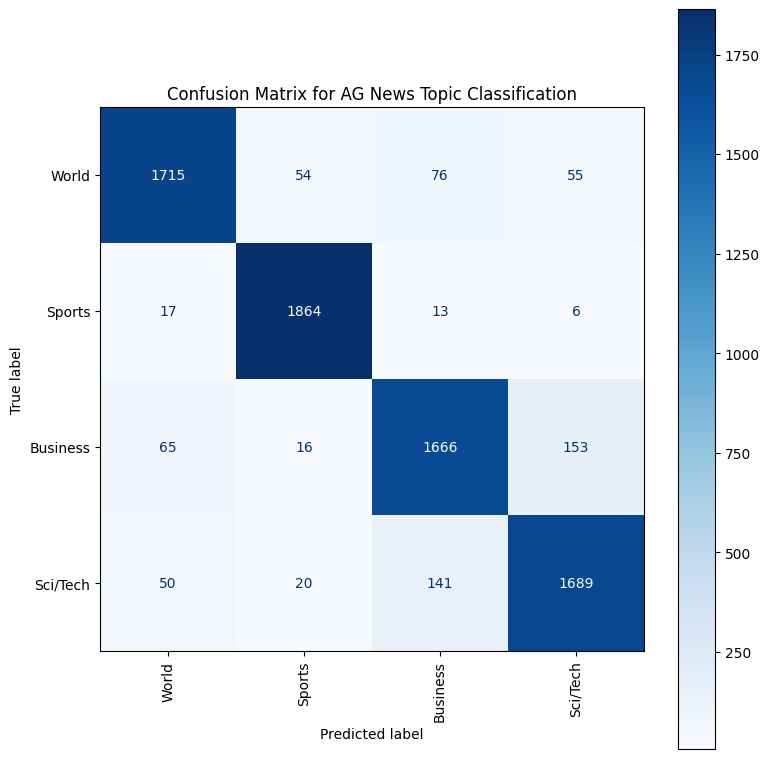


Confusion Matrix Calculated and Displayed. 📊

Interpretation:
- Rows represent **True Labels** (actual news categories).
- Columns represent **Predicted Labels** (model's predicted news categories).
- **Diagonal values** show the number of correct predictions for each category. Higher values here are good! ✅
- **Off-diagonal values** indicate misclassifications. For example, a value in row 'Sports' and column 'Business' means the model predicted 'Business' when the true category was 'Sports'. ❌

Total test items evaluated: 7600


In [8]:
# Import necessary libraries
from datasets import load_dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # A simple yet effective classifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Load the AG News dataset ---
print("Loading AG News dataset...")
ag_news_dataset = None
try:
    ag_news_dataset = load_dataset("ag_news")
    print("AG News dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure you have an active internet connection to download the dataset.")
    raise RuntimeError("Dataset failed to load. Please check your internet connection or try again.")

# --- Step 2: Explore the dataset structure (as before) ---
print("\n--- Dataset Structure ---")
print(ag_news_dataset)

# Accessing the training and test splits
train_data = ag_news_dataset['train']
test_data = ag_news_dataset['test']

print(f"\nNumber of samples in training set: {len(train_data)}")
print(f"Number of samples in test set: {len(test_data)}")

# Get the mapping from integer ID to string label for news categories
label_names = train_data.features['label'].names
print(f"\nLabel Names: {label_names}")

# --- Step 3: Prepare data for text classification ---
# Extract text and labels for training and testing
X_train_text = train_data['text']
y_train = train_data['label']

X_test_text = test_data['text']
y_test = test_data['label']

print(f"\nTraining data samples: {len(X_train_text)}")
print(f"Test data samples: {len(X_test_text)}")

# --- Step 4: Text Vectorization using TF-IDF ---
# TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical vectors.
# It gives higher weight to words that are important in a document but less common across all documents.
print("\nVectorizing text data using TF-IDF...")
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english') # Limit features for simplicity

# Fit the vectorizer on training data and transform both train and test data
X_train_vectorized = vectorizer.fit_transform(X_train_text)
X_test_vectorized = vectorizer.transform(X_test_text)

print(f"Shape of vectorized training data: {X_train_vectorized.shape}")
print(f"Shape of vectorized test data: {X_test_vectorized.shape}")

# --- Step 5: Train a Text Classification Model ---
print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence
model.fit(X_train_vectorized, y_train)
print("Model training complete.")

# --- Step 6: Make Predictions on the Test Set ---
print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test_vectorized)
print("Predictions complete.")

# --- Step 7: Calculate and Display the Confusion Matrix ---
print("\nCalculating Confusion Matrix...")

# Compute the confusion matrix
# Use all possible labels to ensure the matrix covers all classes, even if some aren't predicted in the sample
all_labels = sorted(list(set(y_test) | set(y_pred))) # Union of actual and predicted labels
cm = confusion_matrix(y_test, y_pred, labels=all_labels)

# Display the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8)) # Adjust figure size for clarity
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_names[l] for l in all_labels])
cmp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
ax.set_title("Confusion Matrix for AG News Topic Classification")
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Calculated and Displayed. 📊")
print("\nInterpretation:")
print("- Rows represent **True Labels** (actual news categories).")
print("- Columns represent **Predicted Labels** (model's predicted news categories).")
print("- **Diagonal values** show the number of correct predictions for each category. Higher values here are good! ✅")
print("- **Off-diagonal values** indicate misclassifications. For example, a value in row 'Sports' and column 'Business' means the model predicted 'Business' when the true category was 'Sports'. ❌")
print(f"\nTotal test items evaluated: {len(y_test)}")
